In [1]:
import torch
torch.has_mps

True

In [2]:
torch.device('mps')
def sigmoid(s):
    return 1 / (1 + torch.exp(-s))

def derivative(s):
    return s * (1 - s)

def forward(X, w1, w2):
    #результат вычисления сумматоров первого слоя 
    l1_sum = torch.matmul(w1, X)
    #применение передаточной функции
    l1_result = sigmoid(l1_sum)
    #print("выходы скрытого слоя ",l1_result.size())
    #результат вычисления сумматоров второго слоя
    l2_sum = torch.matmul(w2, l1_result)
    #применение передаточной функции
    l2_result = sigmoid(l2_sum)
    #print("выходы сети", l2_result.size())
    return l2_result, l1_result

def loss(y, y_pred):
    return (y_pred - y).pow(2).sum().item()

def output_error(y, y_pred):
    return (y_pred - y)#.pow(2).sum().item()

def hidden_error(w, err_next_layer):
    return torch.matmul(w, err_next_layer.t())    

#def backward(y_pred, w2, w1):
    

batch:  int = 100 #количество элементов в выборке
inp_size:  int = 3 #размерность входного вектора
    
hidden_layer:  int = 32
output_layer:  int = 2
learning_rate: float = 0.01

X = torch.rand(inp_size, batch)
y = torch.rand(output_layer, batch)    
    
w1 = torch.randn(hidden_layer, inp_size)
w2 = torch.randn(output_layer, hidden_layer)

##grad_l2#.size()
#errors_l1 = hidden_error(w2, errors_l2)
#print("Размерность вектора ошибок выходного слоя:", errors_l2.size())
#print("Размерность вектора ошибок скрытого слоя:", errors_l1.size())

In [3]:
#velocity = momentum (0.9-0.99)* velocity - lr*gradient
import math
def backward(y, y_pred, w1, w2, learning_rate):
    errors_l2 = output_error(y, y_pred) * derivative(y_pred)
    errors_l1 = torch.matmul(w2.t(), errors_l2) * derivative(l1_result)
    
    acc2 = errors_l2.pow(2).sum().item()
    acc1 = errors_l2.pow(2).sum().item()
    
    #w2 -= learning_rate * torch.matmul(errors_l2, l1_result.t())
    #w1 -= learning_rate * torch.matmul(errors_l1, X.t())
    w2 -= (learning_rate/math.sqrt(acc2) ) * torch.matmul(errors_l2, l1_result.t())
    w1 -= (learning_rate/math.sqrt(acc1) ) * torch.matmul(errors_l1, X.t())
    return errors_l2, errors_l1, w2, w1

x_draw = list()
y_draw = list()

for x in range(1000):
    y_pred, l1_result = forward(X, w1,w2)
    ls = loss(y, y_pred)
    errors_l2, errors_l1, w2, w1 = backward(y, y_pred, w1, w2, learning_rate)
    x_draw.append(x)
    y_draw.append(ls)
print(ls)



#считаем ошибку выходного слоя, считаем производную, получаем градиент при умножении
#errors_l2 = output_error(y, y_pred) * derivative(y_pred)
#корректируем веса
#w2 -= learning_rate * torch.matmul(errors_l2, l1_result.t())
#вычисление градиента



14.841134071350098


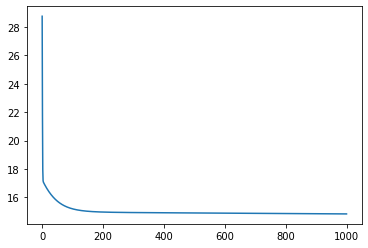

In [4]:
import matplotlib.pyplot as plt
plt.plot(x_draw, y_draw)

In [12]:
def f(x, y):
    return x ** 2 + y ** 2 - 2 * x * y + x - 3 * y
def derivative_by_X(x, y):
    return 2 * x - 2 * y + 1
def derivative_by_Y(x, y):
    return 2 * y - 2 * x - 3
X = 10.
Y = 10.
learning_rate = 0.05
x = torch.tensor(X)
y = torch.tensor(Y)
x_draw = list()
y_draw = list()

tensor(-898.4501)


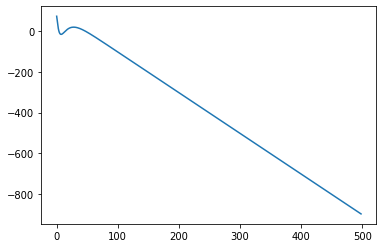

In [13]:


df_dx = derivative_by_X(x, y)
df_dy = derivative_by_Y(x, y)

for x in range(500):
    x -= learning_rate * df_dx
    y -= learning_rate * df_dy
    df_dx = derivative_by_X(x, y)
    df_dy = derivative_by_Y(x, y)
    x_draw.append(x)
    y_draw.append(f(x,y))
plt.plot(x_draw, y_draw)   
print(f(x,y))